## Projet 6 : Analysez les ventes d'une librairie avec R ou Python

## Notebook 2 : Analyses pour Antoine

>Réaliser une analyse des différents indicateurs de vente pour Antoine:
> 1.  L’évolution dans le temps du Chiffre d'Affaires par catégorie et dans le temps.
> 2. Mettre en place une décomposition en moyenne mobile pour évaluer la tendance globale
> 3. Faire un zoom sur les références, pour voir un peu les tops et les flops, la répartition par catégorie, etc.
> 4. Quelques informations sur les profils de nos clients, et également la répartition du chiffre d'affaires entre eux, via par exemple une courbe de Lorenz. 
> 5. Les informations supplémentaires et tous graphiques qui apporteraient de l’information pertinente.


## Sommaire :
 
### Partie 2: Analyses des données pour Antoine

#### [1. Analyse des indicateurs et graphiques autour du chiffre d'affaires](#B1)
- [1.1. Calcul des indicateurs de Chriffre d'Affaires](#B1.1)
- [1.2. Evolution du Chiffre d'Affaires par catégorie](#B1.2)
- [1.3. Evolution du Chiffre d'Affaires par série temporelle](#B1.3)

#### [2. Décomposition en moyenne mobile pour évaluer la tendance globale](#B2)

#### [3. Tops et flops des références avec la répartition par catégorie](#B3)

#### [4. Analyse des profils clients et répartition du chiffre d'affaires entre eux via une courbe de Lorenz](#B4)
- [4.1. Analyse des profils clients](#B4.1)
- [4.2. Répartition du Chiffre d'affaires par tranche d'âge et par sexe via la courbe de Lorenz](#B4.2)

#### [5. Analyses supplémentaires](#B5)
- [5.1. Répartition du Chiffre d'affaires par catégorie de produits](#B5.1)
- [5.2. Pourcentage de Chiffre d'affaires que représente le TOP 10 des produits](#B5.2)
- [5.3. Top 10 des clients](#B5.3)

### Chargement des données du notebook 1

La variable  'ref_produit' est une clé primaire valide.
Lignes avec des valeurs négatives :


,ref_produit,prix,categ
731,T_0,-1.0,0


Mesures statistiques de la variable 'prix':
Moyenne : 21.86
Ecart-type : 29.85
Médiane : 13.07
Mode : 4.99
Asymétrie : 3.80
Curtose : 17.95


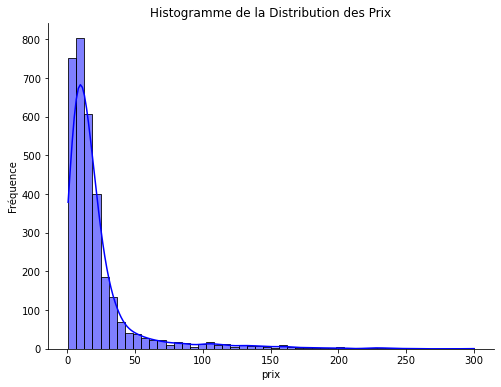

302 valeurs aberrantes ont été détectées selon la méthode IQR avec un seuil de 1.5. Soit 9.19 % des valeurs.

Liste des Livres avec des Valeurs aberrantes de la Méthode IQR:


,ref_produit,prix,categ
10,2_228,225.17,2
11,1_178,51.92,1
38,2_100,72.11,2
49,1_48,47.22,1
64,2_89,107.99,2
...,...,...,...
3267,2_101,63.99,2
3269,1_543,51.99,1
3271,2_123,147.99,2
3279,1_331,55.99,1


Graphique de données selon la  Méthode IQR
 


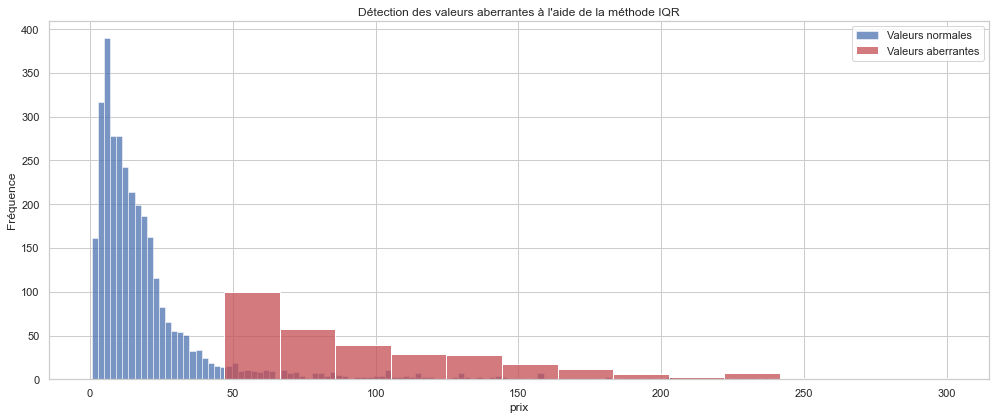

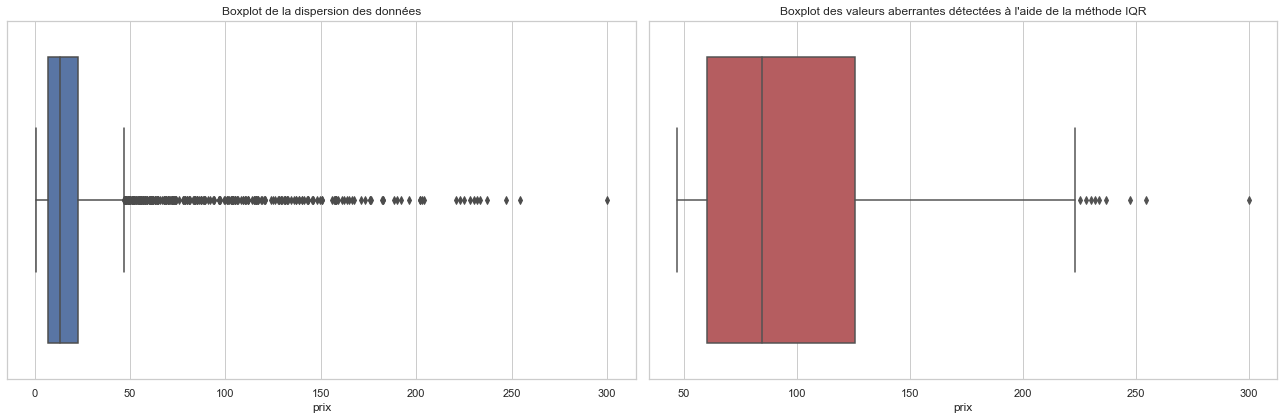

Statistiques descriptives avec outliers :
 count    3286.000000
mean       21.863597
std        29.849786
min         0.620000
25%         6.990000
50%        13.075000
75%        22.990000
max       300.000000
Name: prix, dtype: float64

Statistiques descriptives sans outliers :
 count    2984.000000
mean       14.109427
std         9.679829
min         0.620000
25%         6.570000
50%        11.990000
75%        19.290000
max        46.950000
Name: prix, dtype: float64

Pourcentage de biais: 35.47 %
La variable  'ref_client' est une clé primaire valide.
Nombre de doublons: 126

Liste des doublons:
La Table Transaction contient 200 lignes avec des dates incorrectes. Il est nécessaire d'avoir une explication sur ces données.

Liste des dates incorrectes:
Valeurs uniques dans ref_produit:


array(['T_0'], dtype=object)

Valeurs uniques dans date:


array(['test_2021-03-01 02:30:02.237419',
       'test_2021-03-01 02:30:02.237425',
       'test_2021-03-01 02:30:02.237437',
       'test_2021-03-01 02:30:02.237436',
       'test_2021-03-01 02:30:02.237430',
       'test_2021-03-01 02:30:02.237449',
       'test_2021-03-01 02:30:02.237444',
       'test_2021-03-01 02:30:02.237418',
       'test_2021-03-01 02:30:02.237445',
       'test_2021-03-01 02:30:02.237426',
       'test_2021-03-01 02:30:02.237434',
       'test_2021-03-01 02:30:02.237441',
       'test_2021-03-01 02:30:02.237440',
       'test_2021-03-01 02:30:02.237438',
       'test_2021-03-01 02:30:02.237427',
       'test_2021-03-01 02:30:02.237413',
       'test_2021-03-01 02:30:02.237412',
       'test_2021-03-01 02:30:02.237432',
       'test_2021-03-01 02:30:02.237420',
       'test_2021-03-01 02:30:02.237415',
       'test_2021-03-01 02:30:02.237443',
       'test_2021-03-01 02:30:02.237431',
       'test_2021-03-01 02:30:02.237446',
       'test_2021-03-01 02:30:02.2

Valeurs uniques dans id_session:


array(['s_0'], dtype=object)

Valeurs uniques dans ref_client:
Nombre de lignes restant: 679332
Nombre de doublons: 0
Type de la variable date: datetime64[ns]


In [1]:
%run AKUE_MENDOU_Dalience_1_notebook_032023.ipynb

## Partie 2: Analyses de données pour Antoine

### <a id="B1">1. Analyse des indicateurs et graphiques autour du chiffre d'affaires</a>

>**Pour calculer le chiffre d'affaires, nous allons joindre les deux Tables "produit" et "transaction".**

In [2]:
# Jointure des tables produit et transaction
vente = pd.merge(transaction, produit, on='ref_produit', how='outer', indicator=True)
display(vente['_merge'].unique())  # Affiche l'origine de chaque ligne dans la jointure

# Calcul du chiffre d'affaires de chaque transaction
vente['chiffre_affaires'] = vente['quantite'] * vente['prix']

print('Table vente avec le Chiffre d\'affaires:')
vente.head()

['both', 'left_only', 'right_only']
Categories (3, object): ['left_only', 'right_only', 'both']

Table vente avec le Chiffre d'affaires:


,ref_produit,date,jour,mois,annee,quantite,id_session,ref_client,prix,categ,_merge,chiffre_affaires
0,0_1518,2022-05-20 13:21:29.043970,20.0,5.0,2022.0,1.0,s_211425,c_103,4.18,0.0,both,4.18
1,0_1518,2021-09-26 12:37:29.780414,26.0,9.0,2021.0,1.0,s_95811,c_6197,4.18,0.0,both,4.18
2,0_1518,2021-05-06 17:14:43.117440,6.0,5.0,2021.0,1.0,s_30782,c_682,4.18,0.0,both,4.18
3,0_1518,2022-03-16 18:57:10.420103,16.0,3.0,2022.0,1.0,s_180057,c_5932,4.18,0.0,both,4.18
4,0_1518,2022-11-12 18:58:10.574853,12.0,11.0,2022.0,1.0,s_296584,c_7217,4.18,0.0,both,4.18


In [3]:
# Afficher les lignes uniquement présentes dans la Table "transaction"

print('Produits uniquement présents dans la Table "transaction":', vente[vente['_merge'] == 'left_only'].shape[0])
display(vente[vente['_merge'] == 'left_only'])

# Afficher les lignes uniquement présentes dans la Table "Produit"

print('Produits uniquement présents dans la Table "Produit":', vente[vente['_merge'] == 'right_only'].shape[0])
display(vente[vente['_merge'] == 'right_only'])

# Afficher les lignes présentes dans les deux Tables

print('Produits présents dans les deux Tables:', vente[vente['_merge'] == 'both'].shape[0])
vente[vente['_merge'] == 'both']

Produits uniquement présents dans la Table "transaction": 221


,ref_produit,date,jour,mois,annee,quantite,id_session,ref_client,prix,categ,_merge,chiffre_affaires
542560,0_2245,2022-09-23 07:22:38.636773,23.0,9.0,2022.0,1.0,s_272266,c_4746,NaN,NaN,left_only,NaN
542561,0_2245,2022-07-23 09:24:14.133889,23.0,7.0,2022.0,1.0,s_242482,c_6713,NaN,NaN,left_only,NaN
542562,0_2245,2022-12-03 03:26:35.696673,3.0,12.0,2022.0,1.0,s_306338,c_5108,NaN,NaN,left_only,NaN
542563,0_2245,2021-08-16 11:33:25.481411,16.0,8.0,2021.0,1.0,s_76493,c_1391,NaN,NaN,left_only,NaN
542564,0_2245,2022-07-16 05:53:01.627491,16.0,7.0,2022.0,1.0,s_239078,c_7954,NaN,NaN,left_only,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
542776,0_2245,2021-08-25 09:06:03.504061,25.0,8.0,2021.0,1.0,s_80395,c_131,NaN,NaN,left_only,NaN
542777,0_2245,2022-03-06 19:59:19.462288,6.0,3.0,2022.0,1.0,s_175311,c_4167,NaN,NaN,left_only,NaN
542778,0_2245,2022-05-16 11:35:20.319501,16.0,5.0,2022.0,1.0,s_209381,c_4453,NaN,NaN,left_only,NaN
542779,0_2245,2022-02-11 09:05:43.952857,11.0,2.0,2022.0,1.0,s_163405,c_1098,NaN,NaN,left_only,NaN


Produits uniquement présents dans la Table "Produit": 21


,ref_produit,date,jour,mois,annee,quantite,id_session,ref_client,prix,categ,_merge,chiffre_affaires
679332,0_1016,NaT,NaN,NaN,NaN,NaN,NaN,NaN,35.06,0.0,right_only,NaN
679333,0_1780,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1.67,0.0,right_only,NaN
679334,0_1062,NaT,NaN,NaN,NaN,NaN,NaN,NaN,20.08,0.0,right_only,NaN
679335,0_1119,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2.99,0.0,right_only,NaN
679336,0_1014,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1.15,0.0,right_only,NaN
679337,1_0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,31.82,1.0,right_only,NaN
679338,0_1318,NaT,NaN,NaN,NaN,NaN,NaN,NaN,20.92,0.0,right_only,NaN
679339,0_1800,NaT,NaN,NaN,NaN,NaN,NaN,NaN,22.05,0.0,right_only,NaN
679340,0_1645,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2.99,0.0,right_only,NaN
679341,0_322,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2.99,0.0,right_only,NaN


Produits présents dans les deux Tables: 679111


,ref_produit,date,jour,mois,annee,quantite,id_session,ref_client,prix,categ,_merge,chiffre_affaires
0,0_1518,2022-05-20 13:21:29.043970,20.0,5.0,2022.0,1.0,s_211425,c_103,4.18,0.0,both,4.18
1,0_1518,2021-09-26 12:37:29.780414,26.0,9.0,2021.0,1.0,s_95811,c_6197,4.18,0.0,both,4.18
2,0_1518,2021-05-06 17:14:43.117440,6.0,5.0,2021.0,1.0,s_30782,c_682,4.18,0.0,both,4.18
3,0_1518,2022-03-16 18:57:10.420103,16.0,3.0,2022.0,1.0,s_180057,c_5932,4.18,0.0,both,4.18
4,0_1518,2022-11-12 18:58:10.574853,12.0,11.0,2022.0,1.0,s_296584,c_7217,4.18,0.0,both,4.18
...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1279,2021-06-23 06:50:48.888907,23.0,6.0,2021.0,1.0,s_52563,c_1025,20.99,0.0,both,20.99
679328,0_1683,2021-12-24 04:37:46.407713,24.0,12.0,2021.0,1.0,s_139091,c_5508,2.99,0.0,both,2.99
679329,0_1379,2021-10-16 09:19:09.546713,16.0,10.0,2021.0,1.0,s_105547,c_5425,2.99,0.0,both,2.99
679330,0_886,2021-03-17 03:34:14.461358,17.0,3.0,2021.0,1.0,s_7410,c_7219,21.82,0.0,both,21.82


>Après la jointure, nous constatons que :
> - **221 transactions** enrégistrées dans la Table **"transaction"** n'ont pas de référence correspondante dans la Table **"produit"**. Nous allons faire un examen plus approfondi sur ces lignes.

> - **21 produits** de la table **"produit"** n'ont **pas de transaction enrégistrée** dans la table **"transaction"**. Ce qui signifie qu'ils n'ont pas généré de chiffre d'affaires.

In [4]:
# Affichage des produits concernés par les 221 transactions

vente[vente['_merge'] == 'left_only']['ref_produit'].unique()

array(['0_2245'], dtype=object)

> Après un examun approfondi, les **221 transactions** correspondent à la même référence produit **0_2245**. Pour éviter des erreurs dans nos analyses, les lignes correspondantes seront supprimées de la table.

In [5]:
# Suppression des lignes de référence: 0_2245

produit_manquant = vente.loc[vente['ref_produit'] == '0_2245'].index
vente = vente.drop(produit_manquant)
print('La Table vente contient désormais:', color.BOLD+ f"{vente.shape[0]:,}"+color.END, 'transactions de ventes.')

# Supression de la colonne '_merge'

vente = vente[['ref_produit', 'date', 'jour', 'mois', 'annee', 'quantite','id_session', 'ref_client', 
               'prix', 'categ','chiffre_affaires']]
vente.head()

La Table vente contient désormais: 679,132 transactions de ventes.


,ref_produit,date,jour,mois,annee,quantite,id_session,ref_client,prix,categ,chiffre_affaires
0,0_1518,2022-05-20 13:21:29.043970,20.0,5.0,2022.0,1.0,s_211425,c_103,4.18,0.0,4.18
1,0_1518,2021-09-26 12:37:29.780414,26.0,9.0,2021.0,1.0,s_95811,c_6197,4.18,0.0,4.18
2,0_1518,2021-05-06 17:14:43.117440,6.0,5.0,2021.0,1.0,s_30782,c_682,4.18,0.0,4.18
3,0_1518,2022-03-16 18:57:10.420103,16.0,3.0,2022.0,1.0,s_180057,c_5932,4.18,0.0,4.18
4,0_1518,2022-11-12 18:58:10.574853,12.0,11.0,2022.0,1.0,s_296584,c_7217,4.18,0.0,4.18


###  <a id="B1.1">1.1. Calcul des indicateurs de Chriffre d'Affaires</a>

In [6]:
# Agréger les données par jour et calculer le chiffre d'affaires total pour chaque jour
ca_jour = vente.set_index('date').resample('D')['chiffre_affaires'].sum()

# Calcul des indicateurs de chiffre d'affaires

ca_moyen = ca_jour.mean()
ca_median = ca_jour.median()
ca_ecartType = ca_jour.std()
ca_total = ca_jour.sum()

print(color.BOLD+'Statistiques de Ventes de la librairie:'+color.END)
print(f"Chiffre d'affaires Moyen: {ca_moyen:.2f} €")
print(f"Chiffre d'affaires Médian: {ca_median:.2f} €")
print(f"Ecart-type du Chiffre d'affaires: {ca_ecartType:.2f} €")
print(f"Chiffre d'affaires Total: {ca_total:.2f} €")

Statistiques de Ventes de la librairie:
Chiffre d'affaires Moyen: 16237.98 €
Chiffre d'affaires Médian: 16223.31 €
Ecart-type du Chiffre d'affaires: 1847.91 €
Chiffre d'affaires Total: 11853728.68 €


### <a id="B1.2">1.2. Evolution du Chiffre d'Affaires par catégorie</a>

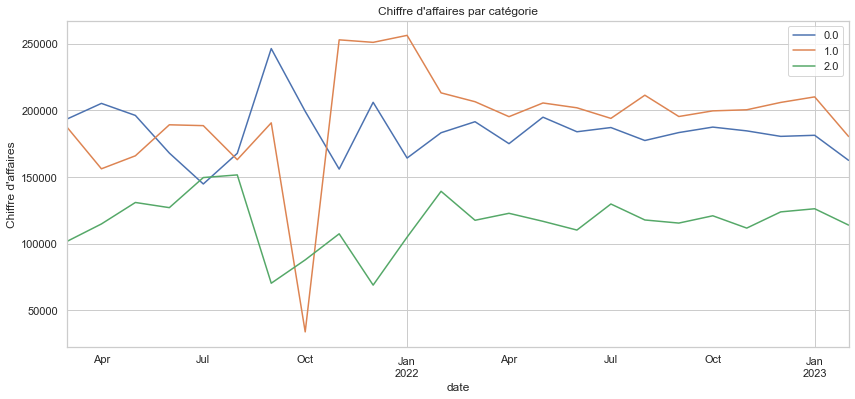

In [7]:
# Grouper les données par catégorie et date, puis calculer le chiffre d'affaires total pour chaque catégorie et date

ca_categ = vente.groupby(['categ', pd.Grouper(key='date', freq='M')])['chiffre_affaires'].sum().reset_index()

# Créer un graphique de chiffre d'affaires par catégorie

fig, ax = plt.subplots(figsize=(14,6))
for cat in vente['categ'].unique():
    ca_categ[ca_categ['categ']==cat].plot(x='date', y='chiffre_affaires', label=cat, ax=ax)

plt.title('Chiffre d\'affaires par catégorie')
plt.ylabel('Chiffre d\'affaires')
plt.show()

>- De façon globale, la **catégorie 1** génère le **plus de Chriffre d'Affaire** suivie de la **catégorie 0** et de la **catégorie 2**.

>- On constate aussi une **chute brutale** assimilée à une **absence de Chriffre d'Affaires** de la **catégorie 2** au mois d'**Octobre 2021**. Pour éviter des erreurs d'analyses dues à cette chute, nous **supprimerons le mois d'octobre 2021** de nos analyses.

In [8]:
# Suppression des transactions du mois d'Octobre 2021

vente_filtree = vente.loc[((vente['date'].dt.month != 10) | (vente['date'].dt.year != 2021))]
vente_filtree

,ref_produit,date,jour,mois,annee,quantite,id_session,ref_client,prix,categ,chiffre_affaires
0,0_1518,2022-05-20 13:21:29.043970,20.0,5.0,2022.0,1.0,s_211425,c_103,4.18,0.0,4.18
1,0_1518,2021-09-26 12:37:29.780414,26.0,9.0,2021.0,1.0,s_95811,c_6197,4.18,0.0,4.18
2,0_1518,2021-05-06 17:14:43.117440,6.0,5.0,2021.0,1.0,s_30782,c_682,4.18,0.0,4.18
3,0_1518,2022-03-16 18:57:10.420103,16.0,3.0,2022.0,1.0,s_180057,c_5932,4.18,0.0,4.18
4,0_1518,2022-11-12 18:58:10.574853,12.0,11.0,2022.0,1.0,s_296584,c_7217,4.18,0.0,4.18
...,...,...,...,...,...,...,...,...,...,...,...
679348,0_1624,NaT,NaN,NaN,NaN,NaN,NaN,NaN,24.50,0.0,NaN
679349,2_86,NaT,NaN,NaN,NaN,NaN,NaN,NaN,132.36,2.0,NaN
679350,0_299,NaT,NaN,NaN,NaN,NaN,NaN,NaN,22.99,0.0,NaN
679351,0_510,NaT,NaN,NaN,NaN,NaN,NaN,NaN,23.66,0.0,NaN


### <a id="B1.3">1.3. Evolution du Chiffre d'Affaires par série temporelle</a>

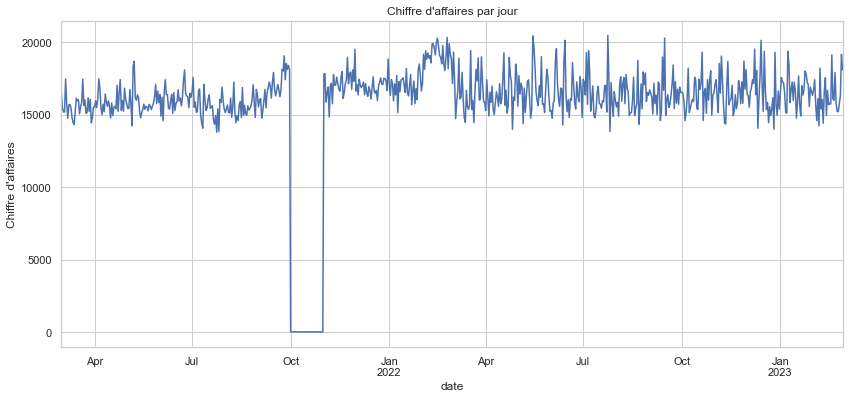

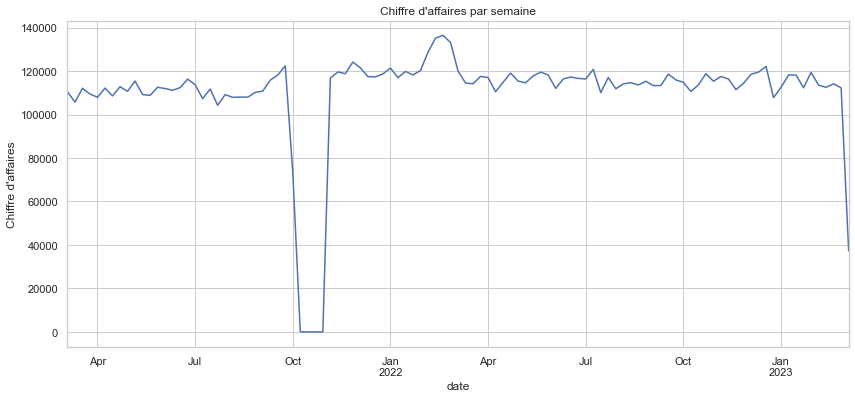

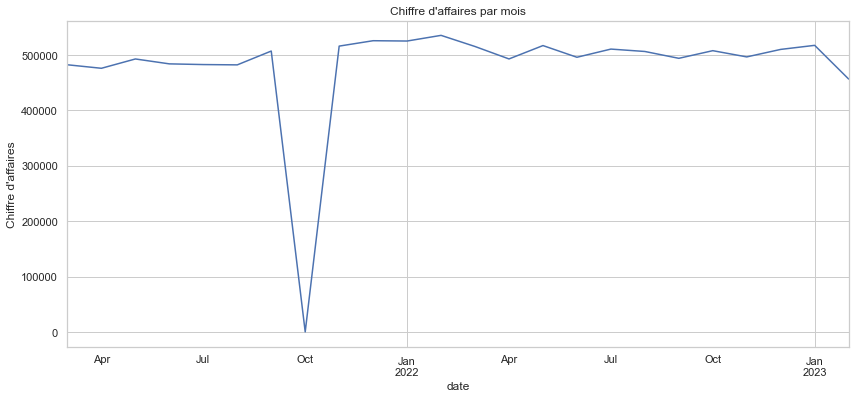

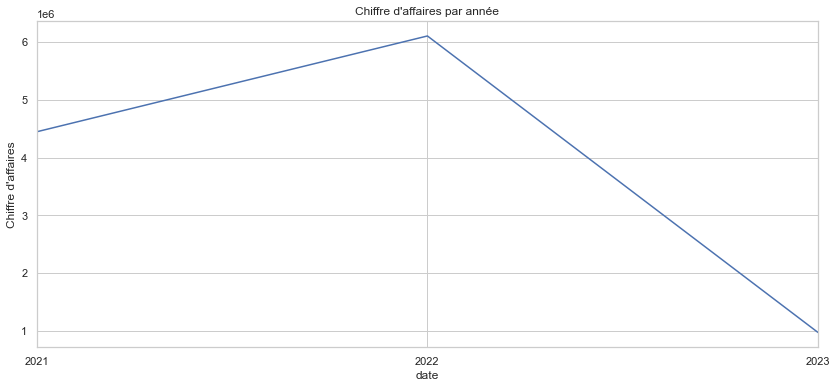

In [9]:
# Agréger les données par jour et calculer le chiffre d'affaires total pour chaque jour avec la table filtrée
ca_jour = vente_filtree.set_index('date').resample('D')['chiffre_affaires'].sum()

# Créer un graphique de chiffre d'affaires par jour
fig, ax = plt.subplots(figsize=(14,6))
ca_jour.plot(ax=ax)
plt.title('Chiffre d\'affaires par jour')
plt.ylabel('Chiffre d\'affaires')
plt.show()

# Agréger les données par semaine et calculer le chiffre d'affaires total pour chaque semaine avec la table filtrée
ca_semaine = vente_filtree.set_index('date').resample('W')['chiffre_affaires'].sum()

# Créer un graphique de chiffre d'affaires par semaine
fig, ax = plt.subplots(figsize=(14,6))
ca_semaine.plot(ax=ax)
plt.title('Chiffre d\'affaires par semaine')
plt.ylabel('Chiffre d\'affaires')
plt.show()

# Agréger les données par mois et calculer le chiffre d'affaires total pour chaque mois avec la table filtrée
ca_mensuel = vente_filtree.set_index('date').resample('M')['chiffre_affaires'].sum()

# Créer un graphique de chiffre d'affaires par mois
fig, ax = plt.subplots(figsize=(14,6))
ca_mensuel.plot(ax=ax)
plt.title('Chiffre d\'affaires par mois')
plt.ylabel('Chiffre d\'affaires')
plt.show()

# Créer un graphique de chiffre d'affaires par année
ca_annuel = vente_filtree.set_index('date').resample('Y')['chiffre_affaires'].sum()

fig, ax = plt.subplots(figsize=(14,6))
ca_annuel.plot(ax=ax)
plt.title('Chiffre d\'affaires par année')
plt.ylabel('Chiffre d\'affaires')
plt.show()

### <a id="B2">2. Décomposition en moyenne mobile pour évaluer la tendance globale</a>

> Pour décomposer en moyenne mobile et évaluer la tendance globale, nous allons utiliser la méthode rolling de pandas pour calculer la moyenne mobile sur une fenêtre de temps donnée.

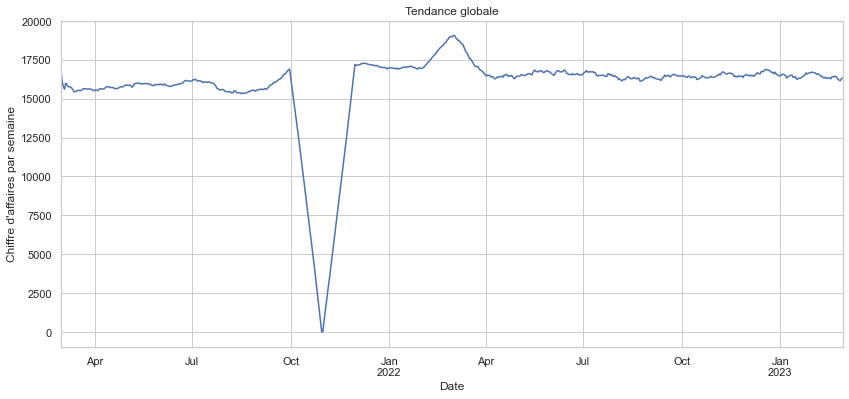

In [22]:
# Décomposition en moyenne mobile
ca_mm = ca_jour.rolling('30D').mean()

# tracer la courbe de la moyenne mobile :
fig, ax= plt.subplots(figsize=(14,6))
ca_mm.plot(title='Tendance globale', xlabel='Date', ylabel='Chiffre d\'affaires par semaine')
plt.show()

 ### <a id="B3">3. Tops et flops des références avec la répartition par catégorie</a>

In [11]:
# Calculer les tops et flops des produits par catégorie

tops_flops = vente_filtree.groupby(['ref_produit', 'categ'])['chiffre_affaires'].sum()
display(tops_flops.sort_values(ascending=False)) # trier les résultats par ordre décroissant pour obtenir les tops et flops

ref_produit  categ
2_159        2.0      92265.68
2_135        2.0      67403.23
2_112        2.0      62840.10
2_102        2.0      58962.58
2_209        2.0      55362.09
                        ...   
0_1620       0.0          0.00
0_1624       0.0          0.00
0_1645       0.0          0.00
2_72         2.0          0.00
0_1062       0.0          0.00
Name: chiffre_affaires, Length: 3284, dtype: float64

### <a id="B4">4. Analyse des profils clients et répartition du chiffre d'affaires entre eux via une courbe de Lorenz</a>
 
 >Pour obtenir des informations sur les profils de nos clients et la répartition du chiffre d'affaires entre eux, nous allons joindre les données de la table client et de la table vente (pour récupérer le CA). Ensuite, analyser les profils clients par sexe et par tranche d'âge.

In [12]:
# Fusionner les tables client et vente

client_vente = pd.merge(client, vente, on='ref_client', how='outer', indicator=True)
client_vente

,ref_client,sexe,annee_naiss,age,groupe_age,ref_produit,date,jour,mois,annee,quantite,id_session,prix,categ,chiffre_affaires,_merge
0,c_4410,F,1967.0,56.0,50-64,0_1277,2022-03-25 00:03:39.156997,25.0,3.0,2022.0,1.0,s_184041,7.99,0.0,7.99,both
1,c_4410,F,1967.0,56.0,50-64,0_1277,2021-09-25 00:03:39.156997,25.0,9.0,2021.0,1.0,s_94984,7.99,0.0,7.99,both
2,c_4410,F,1967.0,56.0,50-64,0_1376,2021-09-24 22:58:27.418343,24.0,9.0,2021.0,1.0,s_94984,16.24,0.0,16.24,both
3,c_4410,F,1967.0,56.0,50-64,0_1376,2022-04-24 22:58:27.418343,24.0,4.0,2022.0,1.0,s_198987,16.24,0.0,16.24,both
4,c_4410,F,1967.0,56.0,50-64,0_1376,2023-01-24 22:58:27.418343,24.0,1.0,2023.0,1.0,s_331878,16.24,0.0,16.24,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679150,NaN,NaN,NaN,NaN,NaN,0_1624,NaT,NaN,NaN,NaN,NaN,NaN,24.50,0.0,NaN,right_only
679151,NaN,NaN,NaN,NaN,NaN,2_86,NaT,NaN,NaN,NaN,NaN,NaN,132.36,2.0,NaN,right_only
679152,NaN,NaN,NaN,NaN,NaN,0_299,NaT,NaN,NaN,NaN,NaN,NaN,22.99,0.0,NaN,right_only
679153,NaN,NaN,NaN,NaN,NaN,0_510,NaT,NaN,NaN,NaN,NaN,NaN,23.66,0.0,NaN,right_only


In [13]:
# Afficher l'origine de chaque ligne dans la jointure

client_vente['_merge'].unique()

['both', 'left_only', 'right_only']
Categories (3, object): ['left_only', 'right_only', 'both']

In [14]:
# Afficher les lignes uniquement présentes dans la Table "client"

print('Clients uniquement présents dans la Table "client":', client_vente[client_vente['_merge'] == 'left_only'].shape[0])
display(client_vente[client_vente['_merge'] == 'left_only'])

# Afficher les lignes uniquement présentes dans la Table "vente"

print('Clients uniquement présents dans la Table "vente":', client_vente[client_vente['_merge'] == 'right_only'].shape[0])
display(client_vente[client_vente['_merge'] == 'left_only'])

# Afficher les lignes présentes dans les deux Tables

print('Clients présents dans les deux Tables:', client_vente[client_vente['_merge'] == 'both'].shape[0])
client_vente[client_vente['_merge'] == 'both']

Clients uniquement présents dans la Table "client": 23


,ref_client,sexe,annee_naiss,age,groupe_age,ref_produit,date,jour,mois,annee,quantite,id_session,prix,categ,chiffre_affaires,_merge
59474,c_8253,F,2001.0,22.0,18-24,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
200224,c_3789,F,1997.0,26.0,25-34,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
218102,c_4406,F,1998.0,25.0,25-34,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
218103,ct_0,F,2001.0,22.0,18-24,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
220316,c_2706,F,1967.0,56.0,50-64,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
225464,c_3443,M,1959.0,64.0,50-64,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
248325,c_4447,M,1956.0,67.0,65-94,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
248881,c_3017,F,1992.0,31.0,25-34,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
260937,c_4086,F,1992.0,31.0,25-34,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
313042,c_6930,M,2004.0,19.0,18-24,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


Clients uniquement présents dans la Table "vente": 21


,ref_client,sexe,annee_naiss,age,groupe_age,ref_produit,date,jour,mois,annee,quantite,id_session,prix,categ,chiffre_affaires,_merge
59474,c_8253,F,2001.0,22.0,18-24,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
200224,c_3789,F,1997.0,26.0,25-34,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
218102,c_4406,F,1998.0,25.0,25-34,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
218103,ct_0,F,2001.0,22.0,18-24,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
220316,c_2706,F,1967.0,56.0,50-64,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
225464,c_3443,M,1959.0,64.0,50-64,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
248325,c_4447,M,1956.0,67.0,65-94,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
248881,c_3017,F,1992.0,31.0,25-34,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
260937,c_4086,F,1992.0,31.0,25-34,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
313042,c_6930,M,2004.0,19.0,18-24,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


Clients présents dans les deux Tables: 679111


,ref_client,sexe,annee_naiss,age,groupe_age,ref_produit,date,jour,mois,annee,quantite,id_session,prix,categ,chiffre_affaires,_merge
0,c_4410,F,1967.0,56.0,50-64,0_1277,2022-03-25 00:03:39.156997,25.0,3.0,2022.0,1.0,s_184041,7.99,0.0,7.99,both
1,c_4410,F,1967.0,56.0,50-64,0_1277,2021-09-25 00:03:39.156997,25.0,9.0,2021.0,1.0,s_94984,7.99,0.0,7.99,both
2,c_4410,F,1967.0,56.0,50-64,0_1376,2021-09-24 22:58:27.418343,24.0,9.0,2021.0,1.0,s_94984,16.24,0.0,16.24,both
3,c_4410,F,1967.0,56.0,50-64,0_1376,2022-04-24 22:58:27.418343,24.0,4.0,2022.0,1.0,s_198987,16.24,0.0,16.24,both
4,c_4410,F,1967.0,56.0,50-64,0_1376,2023-01-24 22:58:27.418343,24.0,1.0,2023.0,1.0,s_331878,16.24,0.0,16.24,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679129,c_84,F,1982.0,41.0,35-49,0_1452,2021-09-20 10:11:35.510099,20.0,9.0,2021.0,1.0,s_92701,13.77,0.0,13.77,both
679130,c_84,F,1982.0,41.0,35-49,0_1110,2021-09-20 10:38:29.498994,20.0,9.0,2021.0,1.0,s_92701,4.71,0.0,4.71,both
679131,c_84,F,1982.0,41.0,35-49,0_1399,2021-10-01 16:13:18.997813,1.0,10.0,2021.0,1.0,s_98493,17.99,0.0,17.99,both
679132,c_84,F,1982.0,41.0,35-49,1_110,2021-09-13 21:39:46.845376,13.0,9.0,2021.0,1.0,s_89478,54.90,1.0,54.90,both


>La fusion entre la table client et vente montre:
>- **23 clients** de la **table client** qui n'ont pas d'achat enrégistré dans la table vente. 
>- **21 références** de la **table vente** qui n'ont pas de correspondance dans la table client

> Pour éviter des erreurs, nous ferons **une jointure interne** pour ne pas tenir compte des ces références. 

In [15]:
# Jointure interne des tables client et vente

client_vente = pd.merge(client, vente, on='ref_client')

# Correction des erreurs de type

client_vente['jour'] = client_vente['jour'].astype(int)
client_vente['mois'] = client_vente['mois'].astype(int)      
client_vente['annee'] = client_vente['annee'].astype(int)      
client_vente['quantite'] = client_vente['quantite'].astype(int) 
client_vente['categ'] = client_vente['categ'].astype(int)
client_vente.dtypes

ref_client                  object
sexe                        object
annee_naiss                  int64
age                          int64
groupe_age                category
ref_produit                 object
date                datetime64[ns]
jour                         int32
mois                         int32
annee                        int32
quantite                     int32
id_session                  object
prix                       float64
categ                        int32
chiffre_affaires           float64
dtype: object

### <a id="B4.1">4.1. Analyse des profils clients</a>

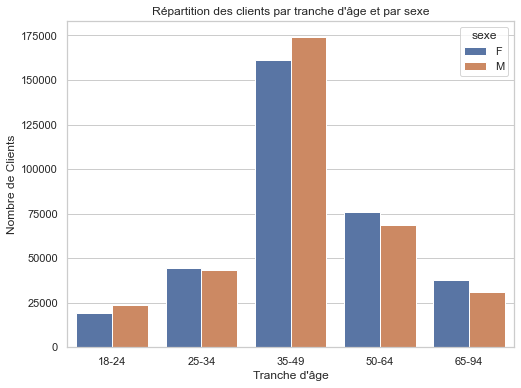

In [16]:
# Créer un diagramme en barres de la répartition des clients par tranche d'âge et par sexe

plt.figure(figsize=(8,6))
plt.title('Répartition des clients par tranche d\'âge et par sexe')
sns.countplot(data=client_vente, x='groupe_age', hue='sexe')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Nombre de Clients')
plt.show()

"Tableau du chiffre d'affaires total par Tranche d'âge"

,groupe_age,chiffre_affaires,part
0,18-24,1804390.04,0.152221
1,25-34,2169074.75,0.182987
2,35-49,4422619.86,0.373099
3,50-64,2310966.50,0.194957
4,65-94,1146677.53,0.096736


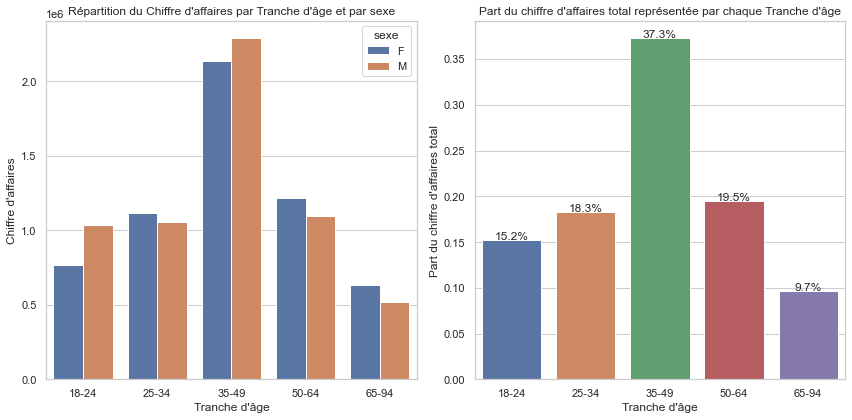

In [17]:
# Calcul du chiffre d'affaires total par groupe d'âge et par sexe
ca_age_sexe = client_vente.groupby(['groupe_age', 'sexe'])['chiffre_affaires'].sum().reset_index()

# Calcul du chiffre d'affaires total par groupe d'âge
ca_age = client_vente.groupby('groupe_age')['chiffre_affaires'].sum().reset_index()

# Calcul de la part du chiffre d'affaires total représentée par chaque groupe d'âge
ca_age['part'] = ca_age['chiffre_affaires'] / ca_age['chiffre_affaires'].sum()
display(f"Tableau du chiffre d'affaires total par Tranche d'âge", ca_age)

# Affichage des résultats
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.barplot(x='groupe_age', y='chiffre_affaires', hue='sexe', data=ca_age_sexe, ax=ax[0])
sns.barplot(x='groupe_age', y='part', data=ca_age, ax=ax[1])
ax[0].set_title('Répartition du Chiffre d\'affaires par Tranche d\'âge et par sexe')
ax[0].set_xlabel('Tranche d\'âge')
ax[0].set_ylabel('Chiffre d\'affaires')
ax[1].set_title('Part du chiffre d\'affaires total représentée par chaque Tranche d\'âge')
ax[1].set_xlabel('Tranche d\'âge')
ax[1].set_ylabel('Part du chiffre d\'affaires total')

# Ajout des pourcentages sur les barres du deuxième graphique
for p in ax[1].patches:
    height = p.get_height()
    ax[1].annotate(f'{height:.1%}', (p.get_x()+p.get_width()/2, height), ha='center')

plt.tight_layout()
plt.show()

### <a id="B4.2">4.2. Répartition du Chiffre d'affaires par tranche d'âge et par sexe via la courbe de Lorenz</a>

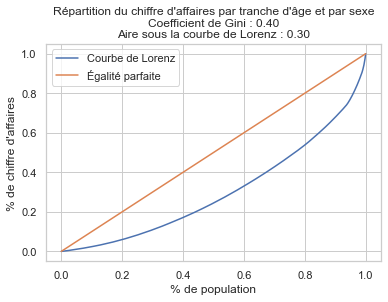

In [18]:
# Créer un dataframe de données de chiffre d'affaire par profils
data_profils = client_vente[['groupe_age', 'sexe', 'chiffre_affaires']]

# Trier les chiffres d'affaires par ordre croissant
sorted_chiffre_affaires = np.sort(data_profils['chiffre_affaires'])
n = sorted_chiffre_affaires.shape[0]

# Calculer les pourcentages cumulés de population et de revenus
cumul_population = np.arange(1, n+1) / n
cumul_chiffre_affaires = np.cumsum(sorted_chiffre_affaires) / np.sum(sorted_chiffre_affaires)

# Calculer le coefficient de Gini
B = np.trapz(cumul_chiffre_affaires, cumul_population)
A = 0.5 - B
gini_coefficient = 2*A

# Calculer l'aire sous la courbe de Lorenz
lorenz_curve_area = np.trapz(cumul_chiffre_affaires, cumul_population)

# Afficher la courbe de Lorenz et le coefficient de Gini
plt.plot(cumul_population, cumul_chiffre_affaires, label='Courbe de Lorenz')
plt.plot([0, 1], [0, 1], label='Égalité parfaite')
plt.legend()
plt.title("Répartition du chiffre d'affaires par tranche d'âge et par sexe\nCoefficient de Gini : {:.2f}\nAire sous la courbe de Lorenz : {:.2f}".format(gini_coefficient, lorenz_curve_area))
plt.xlabel('% de population')
plt.ylabel('% de chiffre d\'affaires')
plt.show()

>- Le **coefficient de Gini de 0.40** indique une **inégalité relativement importante** dans la répartition du chiffre d'affaires parmi les différentes tranches d'âge et les sexes. Cela signifie qu'une **petite partie des clients génère une grande partie du chiffre d'affaires** de la librairie.

>- **L'aire sous la courbe de Lorenz de 0.30** indique également une **distribution inégale du chiffre d'affaires**, où la **partie inférieure de la courbe représente une proportion importante des clients**, mais une **proportion relativement faible du chiffre d'affaires total**.

### <a id="B5">5. Analyses supplémentaires</a>

### <a id="B5.1">5.1. Répartition du Chiffre d'affaires par catégorie de produits</a>

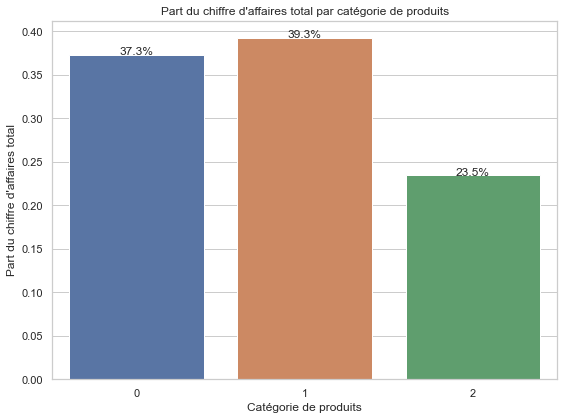

In [19]:
# Calcul du chiffre d'affaires total par catégorie de produits
ca_categorie = client_vente.groupby('categ')['chiffre_affaires'].sum().reset_index()

# Calcul de la part du chiffre d'affaires total représentée par chaque catégorie de produits
ca_categorie['part'] = ca_categorie['chiffre_affaires'] / ca_categorie['chiffre_affaires'].sum()

# Affichage des résultats
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='categ', y='part', data=ca_categorie, ax=ax)
ax.set_title('Part du chiffre d\'affaires total par catégorie de produits')
ax.set_xlabel('Catégorie de produits')
ax.set_ylabel('Part du chiffre d\'affaires total')

# Ajout des pourcentages sur les barres
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1%}', (p.get_x()+p.get_width()/2, height), ha='center')

plt.tight_layout()
plt.show()

### <a id="B5.2">5.2. Pourcentage de Chiffre d'affaires que représente le TOP 10 des produits</a>

In [20]:
# Calcul du chiffre d'affaires total par produit
ca_produit = client_vente.groupby('ref_produit')['chiffre_affaires'].sum().reset_index()

# Trier les produits par chiffre d'affaires décroissant
ca_produit = ca_produit.sort_values('chiffre_affaires', ascending=False)
display(ca_produit.head(10))

# Calcul du pourcentage de chiffre d'affaires représenté par le top 10 des produits
pct_top_10_ca_produit = ca_produit.head(10)['chiffre_affaires'].sum() / ca_produit['chiffre_affaires'].sum()

# Affichage du résultat
print(f"Le top 10 des produits représente {pct_top_10_ca_produit:.1%} du chiffre d'affaires total.")

,ref_produit,chiffre_affaires
3096,2_159,94893.50
3070,2_135,69334.95
3045,2_112,65407.76
3034,2_102,60736.78
3152,2_209,56971.86
2619,1_395,54356.25
2591,1_369,54025.48
3043,2_110,53846.25
3201,2_39,53060.85
3104,2_166,52449.12


Le top 10 des produits représente 5.2% du chiffre d'affaires total.


### <a id="B5.3">5.3. Top 10 des clients</a>

In [21]:
# Calcul du chiffre d'affaires total
ca_total = client_vente['chiffre_affaires'].sum()

# Calcul du chiffre d'affaires réalisé par chaque client
ca_par_client = client_vente.groupby('ref_client')['chiffre_affaires'].sum()

# Sélection des 10 clients qui réalisent le plus de chiffre d'affaires
top10_clients = ca_par_client.nlargest(10)

# Affichage de la liste des 10 clients
print("Les 10 clients qui réalisent le plus de chiffre d'affaires :")
display(top10_clients)

# Calcul du chiffre d'affaires réalisé par le TOP 10 des clients
top10_ca = top10_clients.sum()

# Calcul du pourcentage de chiffre d'affaires représenté par le TOP 10 des clients
top10_pct = top10_ca / ca_total

# Affichage du pourcentage de chiffre d'affaires représenté par le TOP 10 des clients
print(f"\nLe TOP 10 des clients représente {top10_pct:.1%} du chiffre d'affaires total.")

Les 10 clients qui réalisent le plus de chiffre d'affaires :


ref_client
c_1609    324033.35
c_4958    289760.34
c_6714    153598.92
c_3454    113637.93
c_3263      5276.87
c_1570      5271.62
c_2899      5214.05
c_2140      5208.82
c_7319      5155.77
c_7959      5085.45
Name: chiffre_affaires, dtype: float64


Le TOP 10 des clients représente 7.7% du chiffre d'affaires total.
